### Importing modules

In [517]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [518]:
!pip install xgboost
!pip install lightgbm
!pip install catboost

### Loading data

In [520]:
### Loading data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_sub = pd.read_csv("gender_submission.csv")

### Data Exploration

In [522]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [523]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [524]:
sample_sub.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [525]:
train_len = len(train)
all_data=pd.concat([train,test],axis=0)
all_data = all_data.reset_index(drop=True)
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [526]:
all_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [527]:
all_data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<Axes: xlabel='Fare', ylabel='Count'>

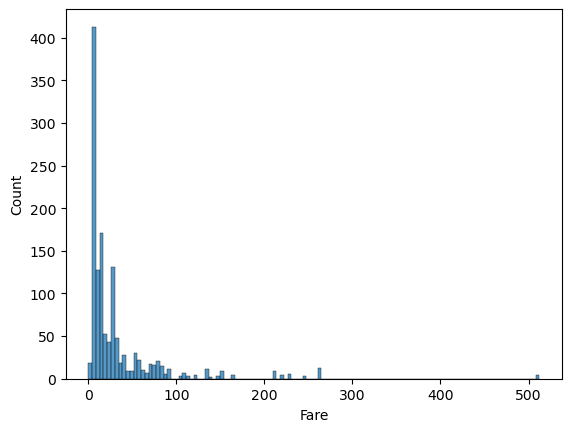

In [528]:
sns.histplot(all_data['Fare'])

<Axes: xlabel='Age', ylabel='Count'>

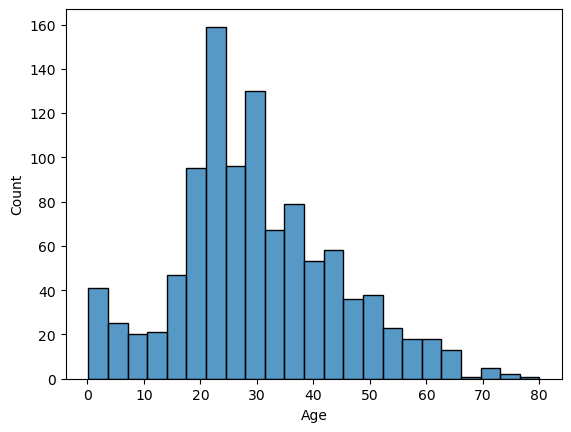

In [529]:
sns.histplot(all_data['Age'])

### Data preprocessing

In [531]:
all_data['Embarked']=all_data['Embarked'].fillna(all_data['Embarked'].mode()[0])


In [532]:
all_data['Age']=all_data['Age'].fillna(all_data['Age'].mean())
all_data['Fare']=all_data['Fare'].fillna(all_data['Fare'].median())

In [533]:
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [534]:
all_data = all_data.drop(columns = ['Cabin','Ticket','Name'])

In [535]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Sex','Embarked']
for col in cols:
    all_data[col] = le.fit_transform(all_data[col])
all_data['Fare'] = (all_data['Fare'] - all_data['Fare'].mean()) / all_data['Fare'].std()

In [536]:
train = all_data.iloc[:train_len,:]
test = all_data.iloc[train_len:,:]

In [537]:
X = train.drop(columns = ['PassengerId','Survived'], axis=1)
y = train['Survived']

### Train test split / Training

In [539]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
def model_training(model):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    print("Accuracy:", accuracy_score(y_val, preds))
    print("Cross validation score:", cross_val_score(model, X, y, cv=5))
    print("Cross validation score mean:", np.mean(cross_val_score(model, X, y, cv=5)))
    print("\nClassification Report:")
    print(classification_report(y_val, preds))

### Model Selection

In [541]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_training(model)

Accuracy: 0.8100558659217877
Cross validation score: [0.78212291 0.78089888 0.78089888 0.76966292 0.82022472]
Cross validation score mean: 0.786761659657272

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84       105
         1.0       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [542]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model_training(model)

Accuracy: 0.7932960893854749
Cross validation score: [0.73184358 0.76404494 0.79213483 0.74719101 0.79213483]
Cross validation score mean: 0.7654698386793045

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82       105
         1.0       0.75      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



In [543]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model_training(model)

Accuracy: 0.8100558659217877
Cross validation score: [0.78212291 0.82022472 0.84269663 0.7752809  0.83707865]
Cross validation score mean: 0.8114807607808675

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       105
         1.0       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [544]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=100, learning_rate=0.1)
model_training(model)

Accuracy: 0.8324022346368715
Cross validation score: [0.79329609 0.82022472 0.85955056 0.80337079 0.85393258]
Cross validation score mean: 0.8260749482141737

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       105
         1.0       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179



In [ ]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(verbose=0)
model_training(model)

In [546]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=0)
model_training(model)

Accuracy: 0.8268156424581006
Cross validation score: [0.81564246 0.79775281 0.84831461 0.79775281 0.85393258]
Cross validation score mean: 0.8226790534178645

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86       105
         1.0       0.85      0.70      0.77        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



### Feeding model with full data

In [573]:
model = XGBClassifier(n_estimators=100, learning_rate=0.1)
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [575]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,-0.491905,1
892,893,NaN,3,0,47.0,1,0,-0.507930,2
893,894,NaN,2,1,62.0,0,0,-0.455990,1
894,895,NaN,3,1,27.0,0,0,-0.475800,2
895,896,NaN,3,0,22.0,1,1,-0.405740,2


In [585]:
X_test = test.drop(columns=['PassengerId','Survived'], axis=1)
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,1,34.5,0,0,-0.491905,1
892,3,0,47.0,1,0,-0.507930,2
893,2,1,62.0,0,0,-0.455990,1
894,3,1,27.0,0,0,-0.475800,2
895,3,0,22.0,1,1,-0.405740,2


In [587]:
predictions = model.predict(X_test)

In [589]:
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Submission

In [598]:
sample_sub['Survived'] = predictions
sample_sub['Survived']=sample_sub['Survived'].astype("int64")
sample_sub.dtypes

PassengerId    int64
Survived       int64
dtype: object

In [594]:
sample_sub.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [600]:
sample_sub.to_csv("submission.csv", index=False)